In [ ]:
!pip install opencv-python matplotlib labelme albumentations 

In [9]:
import time
import os
import cv2
import uuid

In [10]:
PATH_IMAGES = os.path.join('assets', 'images')
IMAGES_NUMBER = 30

In [ ]:
cap = cv2.VideoCapture(0)
for image_number in range(IMAGES_NUMBER):
    print('Capturing Image {}'.format(image_number))
    ret, frame = cap.read()
    img_name = os.path.join(PATH_IMAGES, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(img_name, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        path

cap.release()
cv2.destroyAllWindows()

In [ ]:
# Annotating the images

In [4]:
!labelme

In [ ]:
# Step 2 Review dataset and build image loading function


In [11]:
import tensorflow as tf
import json 
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# Setting GPU Memory Consumption Growth (Out of Memory errors)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [13]:
# Loading images into TF data pipeline
images = tf.data.Dataset.list_files('assets\\images\\*.jpg', shuffle=False)

In [14]:
images.as_numpy_iterator().next()

b'assets\\images\\0034591e-d254-11ed-83c5-182649ceb4c6.jpg'

In [15]:
def load_image(img_path):
    img_bytes = tf.io.read_file(img_path)
    image = tf.io.decode_jpeg(img_bytes)
    return image

In [16]:
images = images.map(load_image)

In [17]:
images.as_numpy_iterator().next()

array([[[160, 164, 165],
        [161, 165, 166],
        [162, 166, 167],
        ...,
        [146, 155, 152],
        [146, 155, 152],
        [146, 155, 152]],

       [[161, 165, 166],
        [161, 165, 166],
        [162, 166, 167],
        ...,
        [146, 155, 152],
        [146, 155, 152],
        [145, 154, 151]],

       [[162, 166, 167],
        [162, 166, 167],
        [163, 167, 168],
        ...,
        [148, 154, 152],
        [147, 153, 151],
        [147, 153, 151]],

       ...,

       [[128, 148, 157],
        [126, 146, 155],
        [127, 145, 155],
        ...,
        [ 13,  18,  12],
        [ 10,  15,   9],
        [  8,  13,   7]],

       [[130, 150, 157],
        [127, 147, 154],
        [126, 146, 153],
        ...,
        [ 15,  20,  14],
        [ 15,  20,  14],
        [ 15,  20,  14]],

       [[131, 151, 158],
        [127, 147, 154],
        [126, 147, 152],
        ...,
        [ 20,  25,  19],
        [ 22,  27,  21],
        [ 23,  28,  22]]

In [18]:
# Viewing images with matplotlib
image_gen = images.batch(4).as_numpy_iterator()

In [19]:
plot_images = image_gen.next()

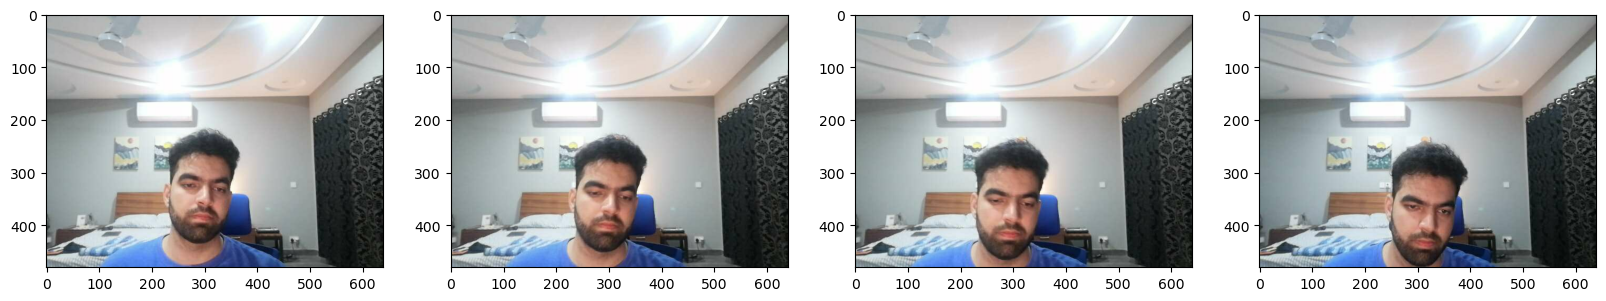

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()    

In [ ]:
# Part 3 Splitting data

In [ ]:
# Manually splitting the dataset into train, test, and split with a split ratio of 70 - 15 - 15

In [ ]:
# Writing a script to move the labels to their respective folders

In [32]:
for folder in ['train', 'test', 'validation']:
    for file in os.listdir(os.path.join('assets', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('assets', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('assets', folder, 'labels', filename)

            os.replace(existing_filepath, new_filepath)

In [ ]:
# Creating an Albumentations pipeline 

In [22]:
import albumentations as alb

In [33]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params = alb.BboxParams(format = 'albumentations', label_fields=['class_labels']))

In [24]:
# Load an image and annotate with openCV and JSON

In [34]:
img = cv2.imread(os.path.join('assets','train','images','5a4b9a2e-d254-11ed-aa8c-182649ceb4c6.jpg'))

In [35]:
img

array([[[150, 150, 150],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [126, 129, 134],
        [125, 128, 133],
        [124, 127, 132]],

       [[150, 150, 150],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [125, 128, 133],
        [124, 127, 132],
        [124, 127, 132]],

       [[150, 150, 150],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [125, 128, 133],
        [124, 127, 132],
        [123, 126, 131]],

       ...,

       [[149, 143, 136],
        [146, 140, 133],
        [135, 129, 122],
        ...,
        [ 16,  21,  20],
        [ 16,  21,  20],
        [ 16,  21,  20]],

       [[149, 143, 136],
        [145, 139, 132],
        [135, 129, 122],
        ...,
        [ 18,  23,  22],
        [ 17,  22,  21],
        [ 17,  22,  21]],

       [[149, 143, 136],
        [145, 139, 132],
        [134, 128, 121],
        ...,
        [ 19,  24,  23],
        [ 18,  23,  22],
        [ 18,  23,  22]]

In [36]:
with open(os.path.join('assets','train','labels','5a4b9a2e-d254-11ed-aa8c-182649ceb4c6.json'), 'r') as f:
    label = json.load(f)

In [37]:
label

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[236.66666666666669, 226.0696517412935],
    [378.4577114427861, 432.5373134328358]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\5a4b9a2e-d254-11ed-aa8c-182649ceb4c6.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHS

In [38]:
# Extracing coordinates and rescaling to match image resolution

In [39]:
label['shapes'][0]['points']

[[236.66666666666669, 226.0696517412935],
 [378.4577114427861, 432.5373134328358]]

In [40]:
coordinates = [0,0,0,0]
coordinates[0] = label['shapes'][0]['points'][0][0]
coordinates[1] = label['shapes'][0]['points'][0][1]
coordinates[2] = label['shapes'][0]['points'][1][0]
coordinates[3] = label['shapes'][0]['points'][1][1]

In [41]:
coordinates

[236.66666666666669, 226.0696517412935, 378.4577114427861, 432.5373134328358]

In [42]:
# Dividing the coordinates by image width and height (albumentations format)

In [43]:
coordinates = list(np.divide(coordinates, [640,480,640,480]))

In [44]:
coordinates

[0.3697916666666667,
 0.4709784411276948,
 0.5913401741293532,
 0.9011194029850745]

In [45]:
# applying augmentation 

In [46]:
augmented = augmentor(image=img, bboxes=[coordinates], class_labels=['face']) # has a type dict

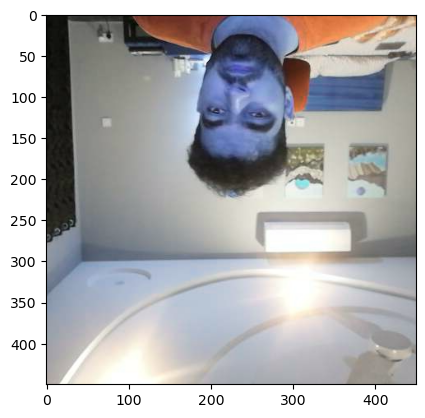

In [47]:
plt.imshow(augmented['image'])

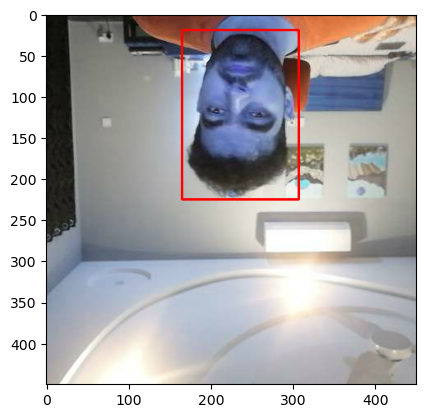

In [48]:
cv2.rectangle(augmented['image'],
             tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
             tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
              (255,0,0), 2)
plt.imshow(augmented['image'])

In [49]:
# Building a pipeline for data augmentation

In [50]:
for partition in ['train', 'test', 'validation']:
    for image in os.listdir(os.path.join('assets', partition, 'images')):
        img = cv2.imread(os.path.join('assets', partition, 'images', image))
        
        coordinates = [0,0,0.00001,0.00001]
        label_path = os.path.join('assets', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            
            coordinates[0] = label['shapes'][0]['points'][0][0]
            coordinates[1] = label['shapes'][0]['points'][0][1]
            coordinates[2] = label['shapes'][0]['points'][1][0]
            coordinates[3] = label['shapes'][0]['points'][1][1]
            
            coordinates = list(np.divide(coordinates, [640,480,640,480]))
            
            try:
                for i in range(60):
                    augmented = augmentor(image=img, bboxes=[coordinates], class_labels=["face"])
                    cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{i}.jpg'), augmented['image'])
                    
                    annotation = {}
                    annotation['image'] = image
                    
                    if(os.path.exists(label_path)):
                        if len(augmented['bboxes']) == 0:
                            annotation['bbox'] = [0,0,0,0]
                            annotation['class'] = 0
                        else:
                            annotation['bbox'] = augmented['bboxes'][0]
                            annotation['class'] = 1
                            
                    else:
                        annotation['bbox'] = [0,0,0,0]
                        annoatation['class'] = 0
                        
                    
                    with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{i}.json'), 'w') as f:
                        json.dump(annotation, f)
                        
            except Exception as e:
                print(e)

In [51]:
# Loading data into a tensorflow dataset

In [52]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [53]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [55]:
validation_images = tf.data.Dataset.list_files('aug_data\\validation\\images\\*.jpg', shuffle=False)
validation_images = validation_images.map(load_image)
validation_images = validation_images.map(lambda x: tf.image.resize(x, (120,120)))
validation_images = validation_images.map(lambda x: x/255)

In [56]:
train_images.as_numpy_iterator().next()

array([[[0.8210784 , 0.82892156, 0.81715685],
        [0.8213848 , 0.8292279 , 0.8174632 ],
        [0.8246936 , 0.82959557, 0.8193015 ],
        ...,
        [0.78382355, 0.8269608 , 0.8504902 ],
        [0.77463233, 0.82420343, 0.8377451 ],
        [0.76458335, 0.81213236, 0.8234069 ]],

       [[0.825     , 0.825     , 0.8240196 ],
        [0.8278799 , 0.8278799 , 0.8268995 ],
        [0.83186275, 0.83137256, 0.8303922 ],
        ...,
        [0.7769608 , 0.82009804, 0.8357843 ],
        [0.77254903, 0.8156863 , 0.8253676 ],
        [0.76525736, 0.8122549 , 0.8188113 ]],

       [[0.827451  , 0.827451  , 0.81960785],
        [0.8352941 , 0.83137256, 0.8235294 ],
        [0.83480394, 0.8308824 , 0.82303923],
        ...,
        [0.77567405, 0.8188113 , 0.8344976 ],
        [0.7724265 , 0.81556374, 0.83125   ],
        [0.766973  , 0.8101103 , 0.82579654]],

       ...,

       [[0.23174019, 0.24742647, 0.2435049 ],
        [0.19558823, 0.2112745 , 0.20735294],
        [0.19466911, 0

In [57]:
# Preparing labels

In [58]:
# Building a label loading function

In [59]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = 'utf-8') as f:
        label = json.load(f)
        
    return [label['class'], label['bbox']]

In [60]:
# Loading labels to the dataset

In [61]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [62]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [63]:
validation_labels = tf.data.Dataset.list_files('aug_data\\validation\\labels\\*.json', shuffle=False)
validation_labels = validation_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [64]:
train_labels.as_numpy_iterator().next()

(1, array([0.4368, 0.4192, 0.8184, 0.941 ], dtype=float16))

In [65]:
# Combining labels and images

In [66]:
# partition lengths
len(train_images), len(train_labels), len(test_images), len(test_labels), len(validation_images), len(validation_labels)

(3360, 3360, 720, 720, 720, 720)

In [67]:
# Building the final datasets

In [71]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(4000)
train = train.batch(8)
train = train.prefetch(4)

In [72]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(4000)
test = test.batch(8)
test = test.prefetch(4)

In [73]:
validation = tf.data.Dataset.zip((validation_images, validation_labels))
validation = validation.shuffle(4000)
validation = validation.batch(8)
validation = validation.prefetch(4)

In [74]:
train.as_numpy_iterator().next()[1]

(array([1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8),
 array([[0.2832 , 0.     , 0.6543 , 0.4646 ],
        [0.1852 , 0.01474, 0.507  , 0.509  ],
        [0.6606 , 0.184  , 0.9097 , 0.511  ],
        [0.3533 , 0.447  , 0.7095 , 0.9556 ],
        [0.5244 , 0.585  , 0.752  , 0.897  ],
        [0.2563 , 0.03555, 0.63   , 0.5376 ],
        [0.499  , 0.1033 , 0.835  , 0.575  ],
        [0.1318 , 0.     , 0.4868 , 0.532  ]], dtype=float16))

In [75]:
# View images 

In [76]:
data_samples = train.as_numpy_iterator()

In [77]:
res = data_samples.next() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


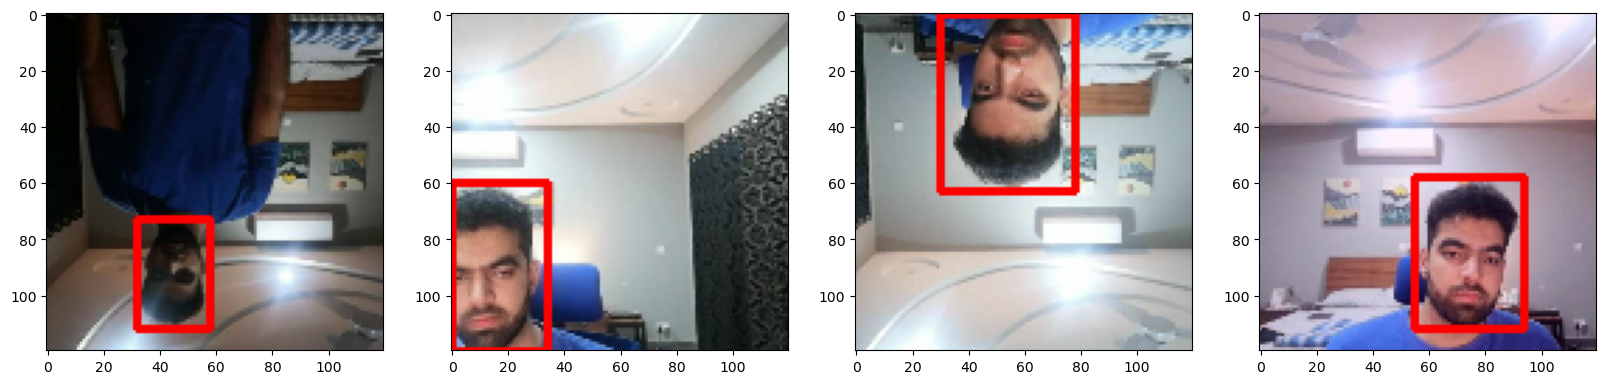

In [78]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coordinates = res[1][1][idx]
    
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coordinates[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coordinates[2:], [120, 120]).astype(int)),
                  (255,0,0),2)
    
    ax[idx].imshow(sample_image)

In [79]:
# Building the Deep Learning model

In [80]:
# Importing the base network
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [81]:
# Downloading VGG16 - an image classification model
vgg = VGG16(include_top=False)

In [82]:
# Let's take a look at what the model looks like
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [83]:
# Function to build thew neural network
def build_model():
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)
    
    # Classification
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Regression - for bounding boxes
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    model = Model(inputs=input_layer, outputs=[class2, regress2])
    return model

In [84]:
# Testing the model
detection_model = build_model()

In [85]:
detection_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [86]:
X, y = train.as_numpy_iterator().next()

In [87]:
X.shape

(8, 120, 120, 3)

In [88]:
# Making a test prediction
classes, coordinates = detection_model.predict(X)

1/1 [==============================] - 0s 345ms/step


In [89]:
classes, coordinates

(array([[0.58037865],
        [0.662557  ],
        [0.5661305 ],
        [0.57409143],
        [0.60422635],
        [0.5441238 ],
        [0.6535828 ],
        [0.58290976]], dtype=float32),
 array([[0.53692865, 0.4838323 , 0.32219124, 0.25313857],
        [0.5807865 , 0.4806824 , 0.3658817 , 0.31552723],
        [0.6481252 , 0.4366893 , 0.29261965, 0.3081219 ],
        [0.66197133, 0.4855748 , 0.31830946, 0.2979398 ],
        [0.6330971 , 0.5743914 , 0.27743772, 0.30161732],
        [0.6207512 , 0.42462796, 0.27115852, 0.25770307],
        [0.5229103 , 0.4103923 , 0.29909092, 0.22541745],
        [0.64791894, 0.44874978, 0.2851041 , 0.25405645]], dtype=float32))

In [90]:
# Losses and Optimizers

In [91]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [139]:
# Optimizer
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [140]:
# Localization Loss
def localization_loss(y_true, y_hat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - y_hat[:,:2]))
    
    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]
    
    h_pred = y_hat[:,3] - y_hat[:,1]
    w_pred = y_hat[:,2] - y_hat[:,0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size

In [141]:
classification_loss = tf.keras.losses.BinaryCrossentropy()
regression_loss = localization_loss

In [142]:
# Checking our metrics for loss
localization_loss(y[1], coordinates).numpy()

7.306912

In [143]:
classification_loss(y[0], classes).numpy()

0.5196266

In [156]:
# Creating the model class
class DetectionModel(Model):
    def __init__(self, model, **kwargs):
        super().__init__(**kwargs)
        self.model = model
        
    def compile(self, opt, classification_loss, localization_loss, **kwargs):
        super().compile(**kwargs)
        self.c_loss = classification_loss
        self.l_loss = localization_loss
        self.opt = opt
        
    def train_step(self, batch, **kwargs):
        X, y = batch
        
        with tf.GradientTape() as tape:
            classes, coordinates = self.model(X, training=True)
            
            batch_classification_loss = self.c_loss(y[0], classes)
            batch_localization_loss = self.l_loss(tf.cast(y[1], tf.float32), coordinates)
            
            total_loss = batch_localization_loss + 0.5 * batch_classification_loss    
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "classification_loss":batch_classification_loss, "regression_loss":batch_localization_loss}
        
    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coordinates = self.model(X, training=False)
        
        batch_classification_loss = self.c_loss(y[0], classes)
        batch_localization_loss = self.l_loss(tf.cast(y[1], tf.float32), coordinates)
        
        total_loss = batch_localization_loss + 0.5 * batch_classification_loss
        
        return {"total_loss":total_loss, "classification_loss":batch_classification_loss, "regression_loss":batch_localization_loss}
    
    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [157]:
model = DetectionModel(detection_model)

In [158]:
model.compile(opt, classification_loss, regression_loss)

In [159]:
# Training the model

In [160]:
logdir='logdirs'

In [161]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [162]:
hist = model.fit(train, epochs=10, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/10
420/420 [==============================] - 779s 2s/step - total_loss: 4.2303e-04 - classification_loss: 7.8043e-07 - regression_loss: 4.2264e-04 - val_total_loss: 0.0021 - val_classification_loss: 3.8222e-06 - val_regression_loss: 0.0021
Epoch 2/10
420/420 [==============================] - 799s 2s/step - total_loss: 3.9133e-04 - classification_loss: 9.3131e-07 - regression_loss: 3.9087e-04 - val_total_loss: 0.0024 - val_classification_loss: 4.0159e-06 - val_regression_loss: 0.0024
Epoch 3/10
420/420 [==============================] - 776s 2s/step - total_loss: 3.5292e-04 - classification_loss: 1.0047e-06 - regression_loss: 3.5241e-04 - val_total_loss: 0.0033 - val_classification_loss: 8.1212e-07 - val_regression_loss: 0.0033
Epoch 4/10
420/420 [==============================] - 795s 2s/step - total_loss: 3.3171e-04 - classification_loss: 8.3786e-07 - regression_loss: 3.3129e-04 - val_total_loss: 0.0015 - val_classification_loss: 9.6113e-07 - val_regression_loss: 0.0015
Epoc

In [104]:
# plotting the hist

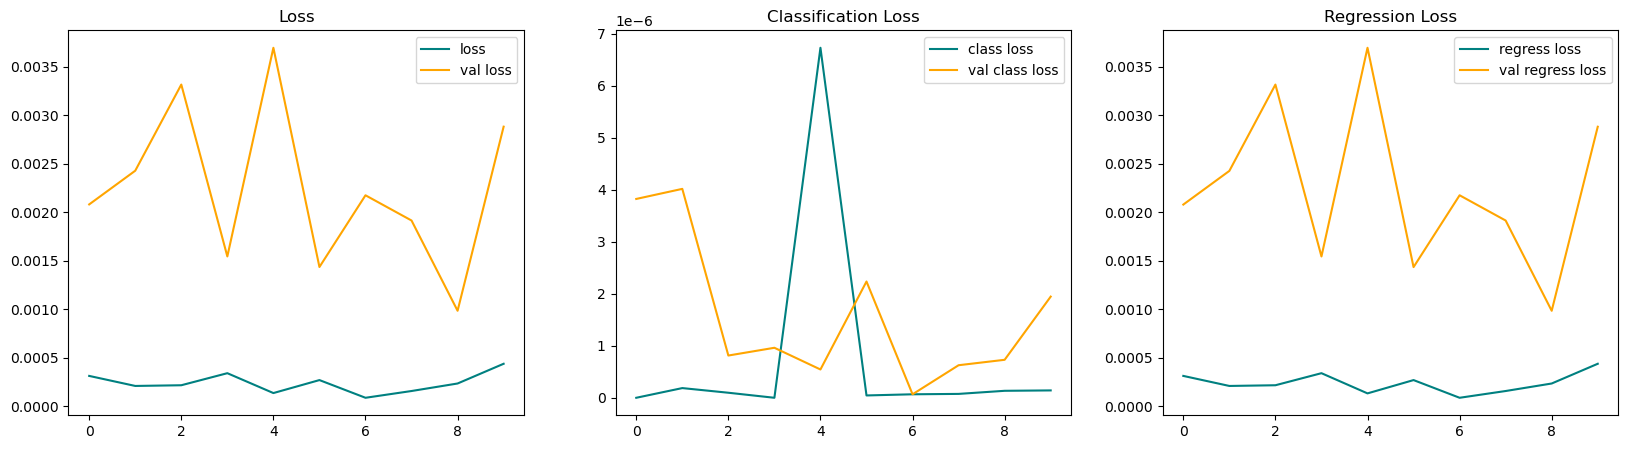

In [163]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['classification_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_classification_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regression_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regression_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [164]:
 # Make predictions

In [165]:
test_data = test.as_numpy_iterator()

In [175]:
test_sample = test_data.next()

In [176]:
y_hat = detection_model.predict(test_sample[0])

1/1 [==============================] - 0s 494ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


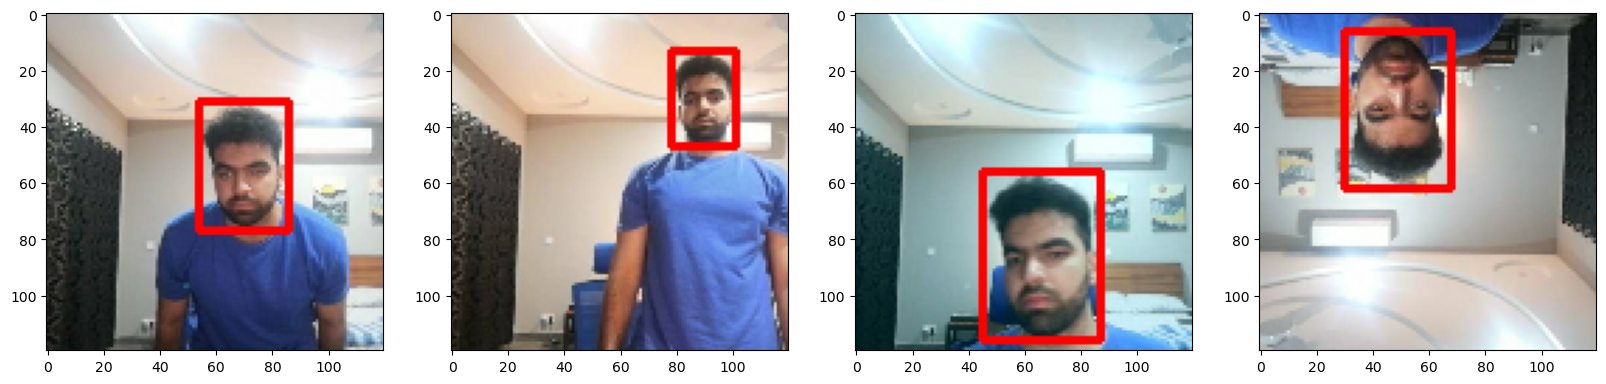

In [177]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = y_hat[1][idx]
    
    if y_hat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                (255,0,0),2)
    
    ax[idx].imshow(sample_image)